# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Revy Aulia]
- **Email:** [muhammad.revy20@gmail.com]
- **ID Dicoding:** [mrevya]

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi dari pembeli?
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Apa produk yang laris yang memiliki revenue terbesar dan produk yang kurang laris?
- Kapan terakhir pembeli melakukan transaksi?
- Seberapa sering seorang pelangggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan oleh pelanggan dalam beberapa bulan terakhir?

In [1]:
%pip install pandas seaborn scipy geopandas folium geopy datetime matplotlib 

In [2]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import scipy as sp
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas import Series, DataFrame
import streamlit
import folium
import geopy as gp




## Data Wrangling

### Gathering Data

In [4]:
customer_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\customers_dataset.csv")
customer_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\3684092802.py:1: SyntaxWarning: invalid escape sequence '\B'
  customer_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\customers_dataset.csv")


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
sellers_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\sellers_dataset.csv")
sellers_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\4082446699.py:1: SyntaxWarning: invalid escape sequence '\B'
  sellers_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\sellers_dataset.csv")


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
order_items_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\order_items_dataset.csv")
order_items_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\4081565088.py:1: SyntaxWarning: invalid escape sequence '\B'
  order_items_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\order_items_dataset.csv")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payment_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\order_payments_dataset.csv")
order_payment_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\2783908731.py:1: SyntaxWarning: invalid escape sequence '\B'
  order_payment_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\order_payments_dataset.csv")


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\order_reviews_dataset.csv")
order_reviews_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1404978424.py:1: SyntaxWarning: invalid escape sequence '\B'
  order_reviews_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\order_reviews_dataset.csv")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\orders_dataset.csv")
orders_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1357094115.py:1: SyntaxWarning: invalid escape sequence '\B'
  orders_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\orders_dataset.csv")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
product_category_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\product_category_name_translation.csv")
product_category_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1753093781.py:1: SyntaxWarning: invalid escape sequence '\B'
  product_category_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\product_category_name_translation.csv")


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\products_dataset.csv")
products_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\4034228176.py:1: SyntaxWarning: invalid escape sequence '\B'
  products_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\products_dataset.csv")


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
geolocation_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\354706922.py:1: SyntaxWarning: invalid escape sequence '\B'
  geolocation_df = pd.read_csv("E:\Bangkit Program\Courses\Belajar Analisis Data dengan Python\Data\E-Commerce Public Dataset\geolocation_dataset.csv")


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Pembeli menyebar dan beragam di berbagai kota dan negara bagian di negara Brazil
- Penjual menyebar dan beragam di berbagai kota dan negara bagian di negara Brazil.
- Terdapat macam-macam harga dan freight value.
- Terdapat berbagai macam pilihan pembayaran yaitu kartu kredit dan tunai dan adanya payment_value.
- Terdapat berbagai macam revuew score, review commment title, dan review comment message.
- Terdapat tanggal dan waktu pada waktu pembayaran, waktu barang dikonfirmasi, tanggal pengiriman, hingga waktu barang sampai.
- Terdapat berbagai macam barang-barang yang dijual di E-Commerce.
- Terdapat berbagai macam geolokasi kota dan negara bagian di negara Brazil. 



### Assessing Data

In [13]:
# Menilai Customers_df
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customer_df.isna().sum() # Mengecek adanya Missing value

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [17]:
# Menilai sellers_df
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [18]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [19]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [21]:
# Menilai order_item_df
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [25]:
# Menilai order_payment_df
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
print("Jumlah duplikasi: ", order_payment_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
order_payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [29]:
# Menilai order_reviews_df
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [31]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [33]:
# Menilai orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [35]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [37]:
# Menilai product_category_df
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [39]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [41]:
# Menilai products_dataset
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [43]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [44]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [45]:
# Menilai geolocation_df
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [46]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [47]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [48]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Pada costumer_df tidak ada invalid, missing, dan duplikasi value.
- Pada seller_df tidak ada invalid, missing, dan duplikasi data/ value.
- Pada order_items_df ada satu data invalid pada shipping limit date, tidak ada duplikasi dan missing value. Rata-rata harga barang adalah 120,65 dan barang termahal sebesar 6735. Lalu pada freight value, rata-rata nilainya adalah 19,99 dan nilai paling tingginya adalah 409.68.
- Pada order_payments_df tidak ada invalid, missing, dan duplikasi data/value. Nilai pembayaran rata-rata sebesar 154,10 dan nilai terbesarnya adalah 13664,08.
- Pada order_reviews_df ada 2 kolom yang memiliki invalid value, terdapat 2 kolom yang memiliki missing value, dan tidak ada duplikasi data. Nilai review score rata-rata adalah 40,86.
- Pada orders_df, ada 5 kolom yang memiliki invalid value, terdapat 3 kolom yang memiliki missing value, dan tidak ada duplikasi data. Terdapat total orderan adalah 99.441.
- Pada product_category_df, terdapat 71 barang yang dialihbahasakan ke dalam bahasa Inggris.
- Pada products_df, tidak ada invalid value, terdapat 8 kolom yang memiliki missing value, dan tidak ada duplikasi.
- Pada geolocation_df, tidak ada invalid value, tidak ada missing value, dan terdapat duplikasi data sebesar 261.831



### Cleaning Data

In [49]:
# Membersihkan orders_items_df
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [50]:
date_time_columns = ["shipping_limit_date"]
for column in date_time_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

In [51]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [52]:
# Membersihkan orders_reviews_df
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [53]:
review_date = ["review_creation_date", "review_answer_timestamp"]
for column in review_date:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [54]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [55]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Atraso na entrega do prod      1
Compras On Line                1
Relogio de pulso               1
Ótima mercadoria               1
Maravilhoso!                   1
Name: count, Length: 4527, dtype: int64

In [56]:
order_reviews_df.fillna(value="Recomendo", inplace=True)

In [57]:
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [58]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [59]:
order_date = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in order_date:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [60]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [61]:
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 19:36:48    3
2018-05-14 20:02:44    3
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-07-24 21:36:42    3
                      ..
2017-10-06 16:58:25    1
2017-06-19 19:19:30    1
2017-07-19 22:10:03    1
2018-06-04 23:54:32    1
2017-11-21 17:06:59    1
Name: count, Length: 95664, dtype: int64

In [62]:
orders_df.fillna(value="2018-05-08 19:36:48", inplace=True)

In [63]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [64]:
# Membersihkan products_df
products_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [65]:
products_df.fillna(value="cama_mesa_banho", inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1627234901.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cama_mesa_banho' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="cama_mesa_banho", inplace=True)


In [66]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [67]:
# Membersihkan geolocation_df
geolocation_df.drop_duplicates(inplace=True)

In [68]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada order_items_df, terdapat 1 invalid value berhasil diselesaikan dengan mengubah menjadi datetime.
- Pada order_reviews_df, terdapat 2 invalid value yang berhasil diselesaikan dengan mengubahnya menjadi datetime dan terdapat 2 kolom yang missing value dan berhasil diatasi dengan fillna.
- Pada orders_df, terdapat 5 invalid value yang berhasil diubah ke datetime dan ada 2 kolom yang missing value yang berhasil diatasi dengan fillna.
- Pada products_df, terdapat 8 kolom yang missing value yang sudah berhasil diatasi dengan fillna.
- Pada geolocation_df, terdapat duplikasi data dan berhasi diatasi dengan menghapus duplikasi.



## Exploratory Data Analysis (EDA)

### Explore customers_df

In [69]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [70]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [71]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


### Explore seller_df

In [72]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [73]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


In [74]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


### Explore order_items_df

In [75]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### Explore order_payment_df

In [76]:
order_payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [77]:
order_payment_df.groupby(by="payment_type").agg({
    "order_id" : "nunique",
    "payment_installments": ["max", "min", "mean", "std"],
    "payment_value": ["max", "min", "mean", "std"],
    "payment_sequential" : ["max", "min", "mean", "std"]
})

order_id payment_installments                         \
              nunique                  max min      mean      std   
payment_type                                                        
boleto          19784                    1   1  1.000000  0.00000   
credit_card     76505                   24   0  3.507155  2.85099   
debit_card       1528                    1   1  1.000000  0.00000   
not_defined         3                    1   1  1.000000  0.00000   
voucher          3866                    1   1  1.000000  0.00000   

             payment_value                                payment_sequential  \
                       max    min        mean         std                max   
payment_type                                                                   
boleto             7274.88  11.62  145.034435  213.581061                  2   
credit_card       13664.08   0.01  163.319021  222.119311                  3   
debit_card         4445.50  13.38  142.570170  245.793401                  3   
not_defined           0.00   0.00    0.000000    0.000000                  1   
voucher            3184.34   0.00   65.703354  115.519185                 29   

                                      
             min      mean       std  
payment_type                          
boleto         1  1.000051  0.007110  
credit_card    1  1.004167  0.064619  
debit_card     1  1.034663  0.186527  
not_defined    1  1.000000  0.000000  
voucher        1  2.602424  2.550195

### Explore order_reviews_df

In [78]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Recomendo,NaN,NaN
freq,3,3,NaN,88079,58347,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


### Explore orders_df

In [79]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 23:32:04.215695872,2018-01-07 03:09:02.364537600,2018-01-17 21:57:21.906587904,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-05 09:55:24,2018-05-08 19:36:48,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [80]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


### Explore products_df

In [81]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,106392145fca363410d287a815be6de4,cama_mesa_banho,60.0,cama_mesa_banho,1.0,200.0,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


### Explore gabungan order_df dan customer_df

In [82]:
order_customer = pd.merge(
    left=orders_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


### Explore gabungan order_payment_df dan product_item_df

In [83]:
order_item_product = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [84]:
order_item_product.groupby(by="product_category_name").agg({
    "order_id" : "nunique",
    "price" : "sum",
    "freight_value" : "sum"
})

,order_id,price,freight_value
product_category_name,,,
agro_industria_e_comercio,182,72530.47,5843.60
alimentos,450,29393.41,7271.03
alimentos_bebidas,227,15179.48,4507.99
artes,202,24202.64,4045.17
artes_e_artesanato,23,1814.01,370.13
...,...,...,...
sinalizacao_e_seguranca,140,21509.23,6507.82
tablets_impressao_imagem,79,7528.41,1226.20
telefonia,4199,323667.53,71215.79


### Explore gabungan order_payment dan order_review

In [85]:
order_payment_review = pd.merge(
    left=order_payment_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Recomendo,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Recomendo,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Recomendo,2017-12-21,2017-12-22 01:10:39


In [86]:
order_payment_review.groupby(by="payment_type").agg({
    "order_id" : "nunique",
    "payment_value" : "sum",
    "review_score" : "mean"
})

,order_id,payment_value,review_score
payment_type,,,
boleto,19784,2886679.49,4.086631
credit_card,76505,12594157.13,4.087637
debit_card,1528,218721.13,4.168084
not_defined,3,0.00,1.666667
voucher,3866,381862.99,4.003804


## Explore all_df

In [87]:
all1_df = pd.merge(
    left=order_item_product,
    right=order_payment_review,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all1_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,Recomendo,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,Recomendo,Recomendo,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,Recomendo,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,Recomendo,Recomendo,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,Recomendo,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [88]:
all_df = pd.merge(
    left=all1_df,
    right=order_customer,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [89]:
all_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "price" : "sum",
    "freight_value" : "sum",
    "payment_value" : "sum",
    "review_score" : "mean"
})

price  freight_value  \
customer_city       product_category_name                           
abadia dos dourados cool_stuff              199.00          20.63   
                    esporte_lazer           120.00          15.59   
                    livros_interesse_geral   39.90          18.38   
abadiania           eletroportateis         949.99          75.53   
abaete              bebes                    65.00          17.70   
...                                            ...            ...   
ze doca             esporte_lazer           149.90          38.60   
                    ferramentas_jardim       39.90          26.61   
                    instrumentos_musicais   359.00          49.04   
zortea              cama_mesa_banho          29.90          16.79   
                    informatica_acessorios   69.90          20.98   

                                            payment_value  review_score  
customer_city       product_category_name                                
abadia dos dourados cool_stuff                     219.63           5.0  
                    esporte_lazer                  135.59           5.0  
                    livros_interesse_geral          58.28           5.0  
abadiania           eletroportateis               1025.52           4.0  
abaete              bebes                           82.70           4.0  
...                                                   ...           ...  
ze doca             esporte_lazer                  188.50           3.0  
                    ferramentas_jardim              66.51           5.0  
                    instrumentos_musicais          408.04           3.0  
zortea              cama_mesa_banho                 46.69           5.0  
                    informatica_acessorios          90.88           3.0  

[25350 rows x 4 columns]

**Insight:**
- Pada customers_df, kota Sao Paolo menjadi kota paling banyak yang memiliki pembeli disusul kota Rio de Janeiro dan Belo Horizonte. Negara bagian yang paling banyak pembeli adalah SP.
- Pada seller_df, penjual terbanyak berada pada kota Rio de Janeiro. Negara bagian yang memiliki paling banyak pembeli adalah SP.
- Pada order_items_df, harga rata-rata adalah 120,65, harga paling kecil adalah 0,85 dan harga paling tinggi adalah 6735.
- Pada order_payment_df, pengguna kartu kredit paling banyak dan nilai pembelian tertinggi adalah 13664,08.
- Pada order_review_df, review tertinggi bernilai 5.0, rata-rata rating review adalah 4.086421, dan rating review terkecil adalah 1.0.
- Pada orders_df, jumlah order status adalah 99441. Order yang berhasil diantar adalah 96478.
- Pada order_item_product, harga barang yang tertinggi adalah utilidades_domesticas dan barang yang paling banyak dibeli adalah telefonia.
- Pada order_payment_review, penggunaan kartu kredit memiliki nilai yang paling besar dengan rata-rata review score 4.087 dan diikuti oleh boleto atau kupon.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Demografi dari Pembeli

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\3259055076.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\3259055076.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


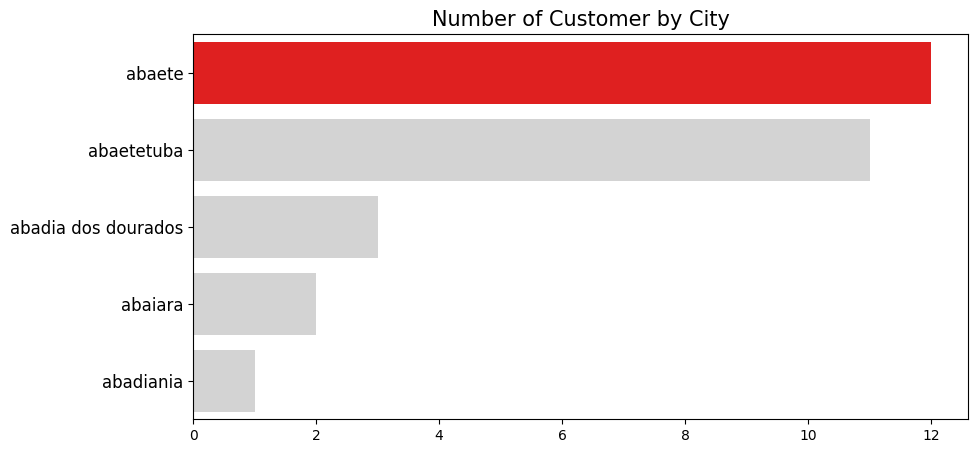

In [100]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index().head(5)
bycity_df.rename(columns={
    "customer_id" : "customer_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(10,5))
colors = ["#FF0000", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False),
    palette=colors

)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\615278633.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\615278633.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


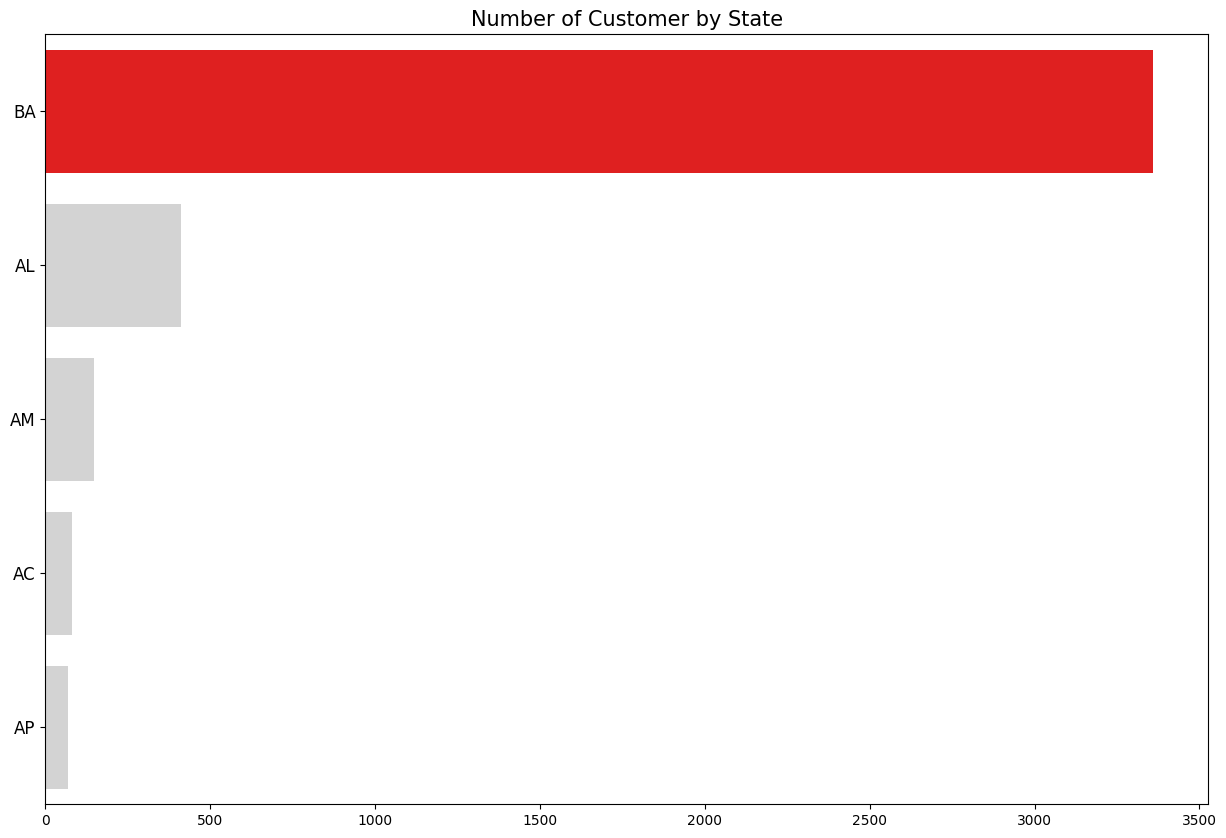

In [101]:
bycity_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index().head(5)
bycity_df.rename(columns={
    "customer_id" : "customer_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(15,10))
colors = ["#FF0000", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bycity_df.sort_values(by="customer_count", ascending=False),
    palette=colors

)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [92]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id" : "nunique",
    "price" : "sum",
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id" : "order_count",
    "price" : "revenue"
}, inplace=True)
monthly_orders_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1341489906.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_count,revenue
order_purchase_timestamp,,
2016-09,3,267.36
2016-10,308,51068.92
2016-11,0,0.00
2016-12,1,10.90
2017-01,789,129895.32


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\2274921694.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


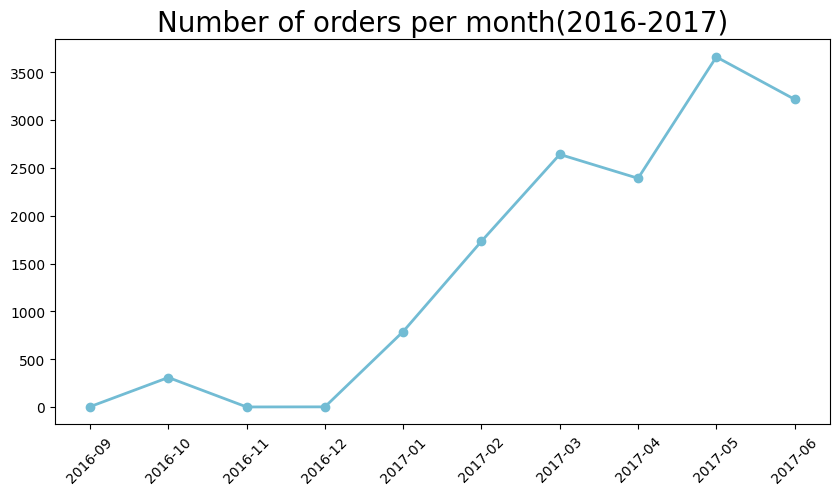

In [93]:
monthly_orders = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id" : "nunique",
    "price" : "sum"
})
#monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m-%d")
monthly_orders_df = monthly_orders_df.reset_index().head(10)
monthly_orders_df.rename(columns={
    "order_id" : "order_count",
    "price" : "revenue"
}, inplace=True)

# Grafik garis
plt.figure(figsize=(10,5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of orders per month(2016-2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

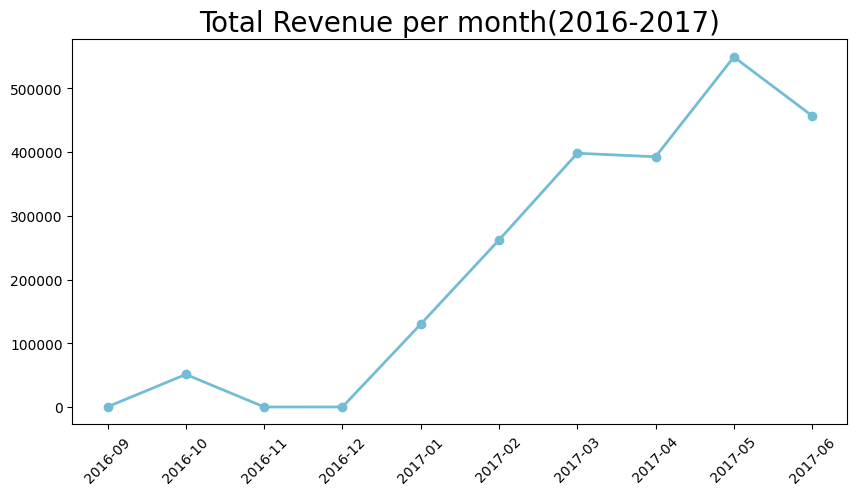

In [94]:
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per month(2016-2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 3: Apa produk yang paling laris dan kurang laris?

In [95]:
sum_order_items_df = all_df.groupby(by="product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "order_item_id" : "total_order"
}, inplace=True)
sum_order_items_df.head(10)

,product_category_name,total_order
0,cama_mesa_banho,16790
1,moveis_decoracao,12185
2,beleza_saude,11491
3,esporte_lazer,10348
4,informatica_acessorios,10272
5,utilidades_domesticas,9559
6,relogios_presentes,6823
7,ferramentas_jardim,6152
8,telefonia,5354
9,automotivo,5067


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1212990707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_order", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1212990707.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_order", y="product_category_name", data=sum_order_items_df.sort_values(by="total_order", ascending=True).head(5), palette=colors, ax=ax[1])


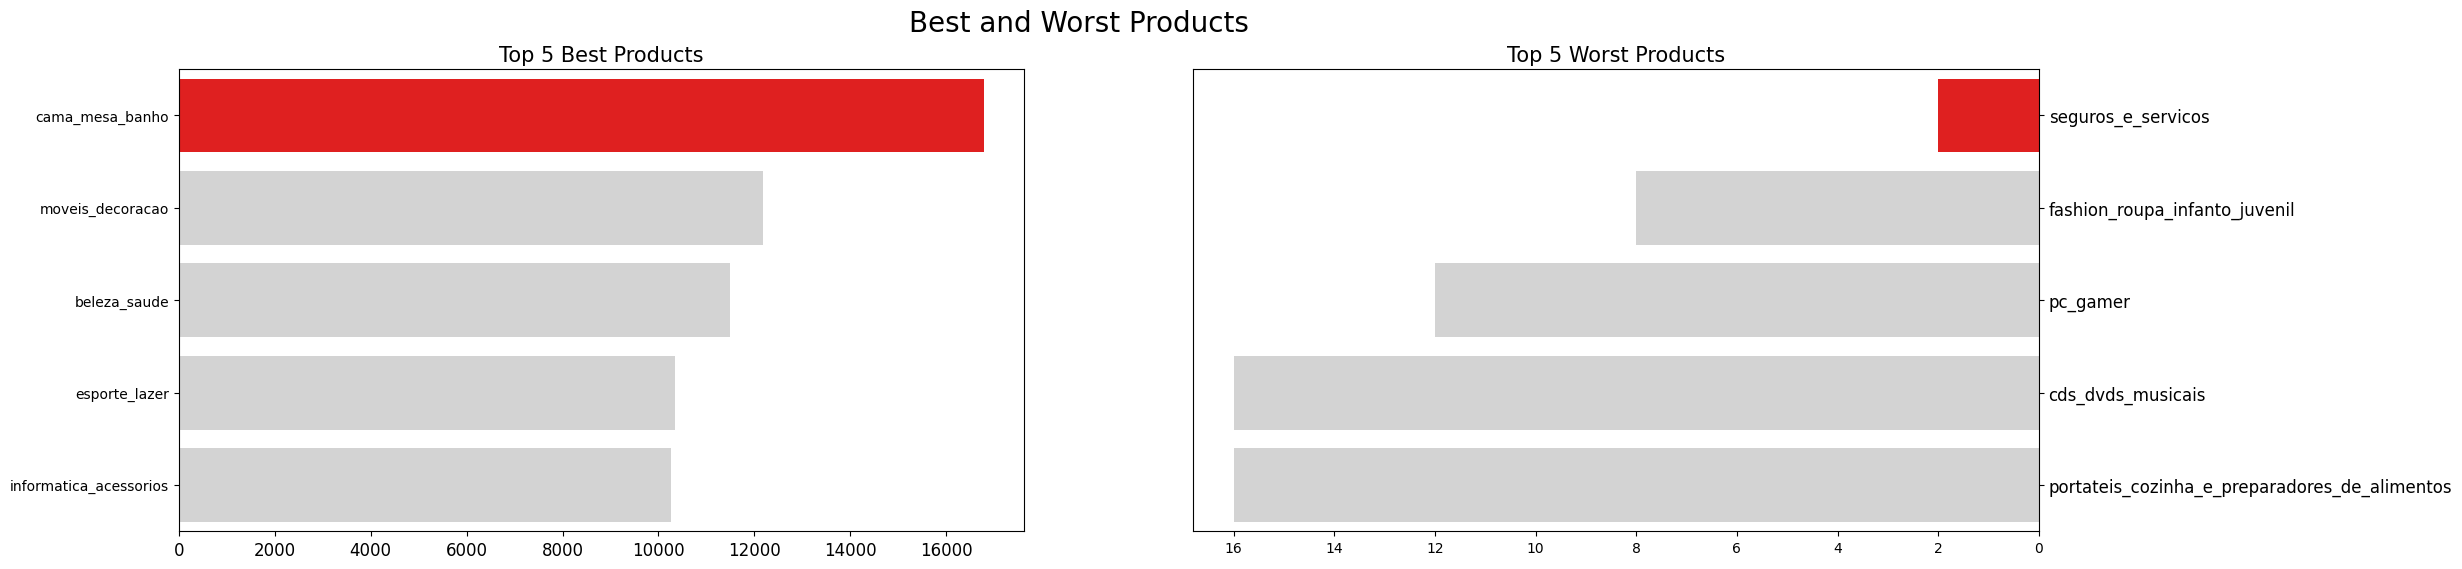

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#FF0000", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3"]

# Membuat Best Peforming Product
sns.barplot(x="total_order", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Best Products", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)

# Membuat Worst Performing Product
sns.barplot(x="total_order", y="product_category_name", data=sum_order_items_df.sort_values(by="total_order", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Worst Products", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Products", fontsize=20)
plt.show()


**Insight:**
- Abaete menjadi kota terbanyak dari pembeli dan BA menjadi negara bagian terbanyak dari pembeli.
- Jumlah jumlah peningkatan order terjadi pada 1 Januari 2017, 28 Februari 2017, 31 Maret 2017, dan 31 Mei 2017.
- Total order terbesar pada produk cama_mesa_banho dan produk yang kurang laris adalah seguros e servicos.

### Pertanyaan 4,5,6: Kapan terakhir pembeli melakukan transaksi?  Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir? Berapa banyak uang yang dihabiskan oleh pelanggan dalam beberapa bulan terakhir?

## Analisis Lanjutan (Opsional)

In [97]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp" : "max", #mengambil tanggal order terakhir
    "order_id" : "nunique", # menghitung jumlah order
    "price" : "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

rfm_df.drop(columns="max_order_timestamp", inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1378936157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x = "customer_id", data=rfm_df.sort_values(by="recency", ascending=True).reset_index().head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1378936157.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7604\1378936157.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=Fa

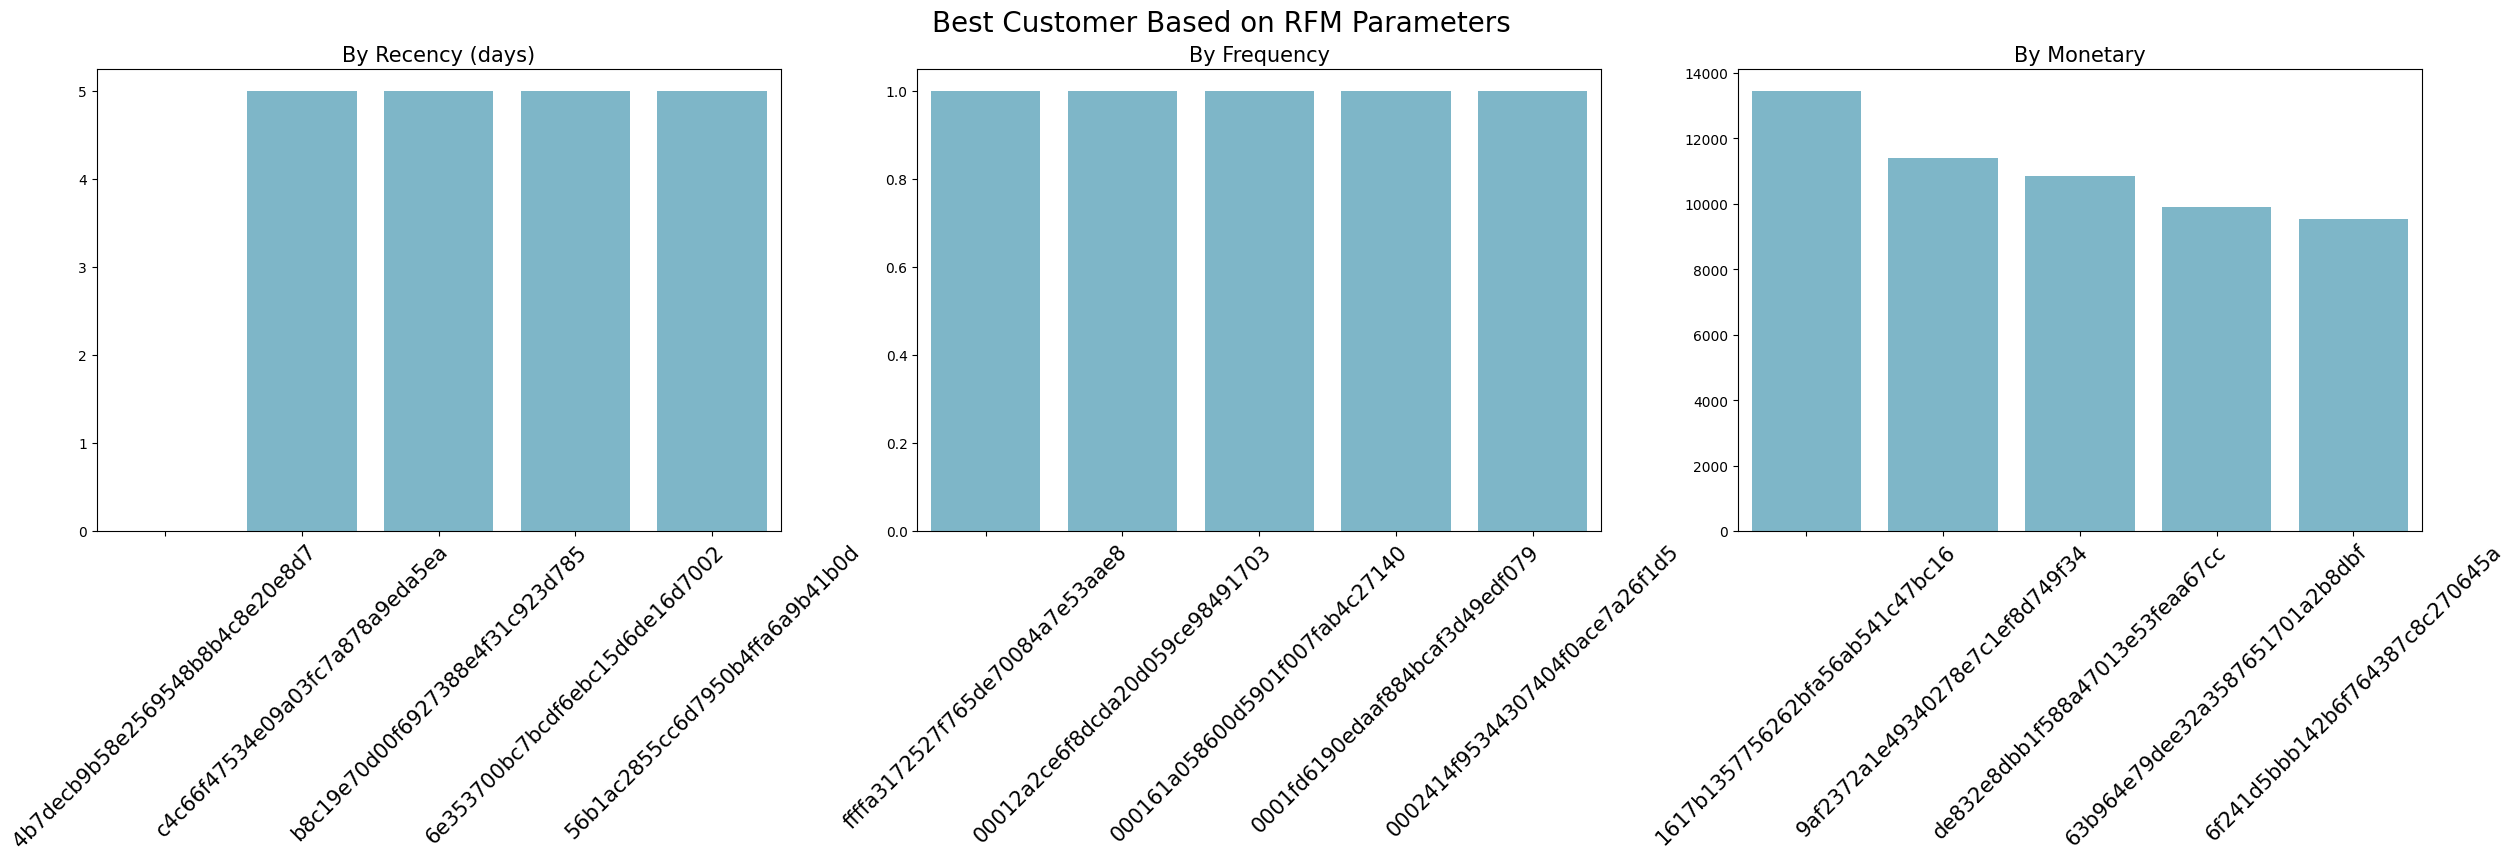

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

colors = ["#72BCD4", "#72BCD4","#72BCD4","#72BCD4","#72BCD4"]

# Bagian recency
sns.barplot(y="recency", x = "customer_id", data=rfm_df.sort_values(by="recency", ascending=True).reset_index().head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45) 
#ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=45)

# Bagian frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).reset_index().head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
#ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=45)
# Bagian Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).reset_index().head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
#ax[2].set_yticklabels(ax[2].get_yticklabels(), rotation=45)

# Plot
plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Abaete menjadi kota terbanyak dari pembeli dan BA menjadi negara bagian terbanyak dari pembeli
- Conclution pertanyaan 2: Jumlah jumlah peningkatan order terjadi pada 1 Januari 2017, 28 Februari 2017, 31 Maret 2017, dan 31 Mei 2017.
- Conclution pertanyaan 3 : Total order terbesar pada produk cama_mesa_banho dan produk yang kurang laris adalah seguros e servicos
- Conclution pertanyaan 4, 5 , dan 6 : 